In [19]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [20]:
import matplotlib.pyplot as plt
%matplotlib inline
from mlxtend.plotting import plot_decision_regions

In [21]:
features = np.load("./datasets/mcp_iris/features.npy")
targets = np.load("./datasets/mcp_iris/targets.npy")

In [22]:
print(np.unique(targets))

[-1  1]


In [23]:
setosa = features[targets == -1]
versicolor = features[targets == 1]

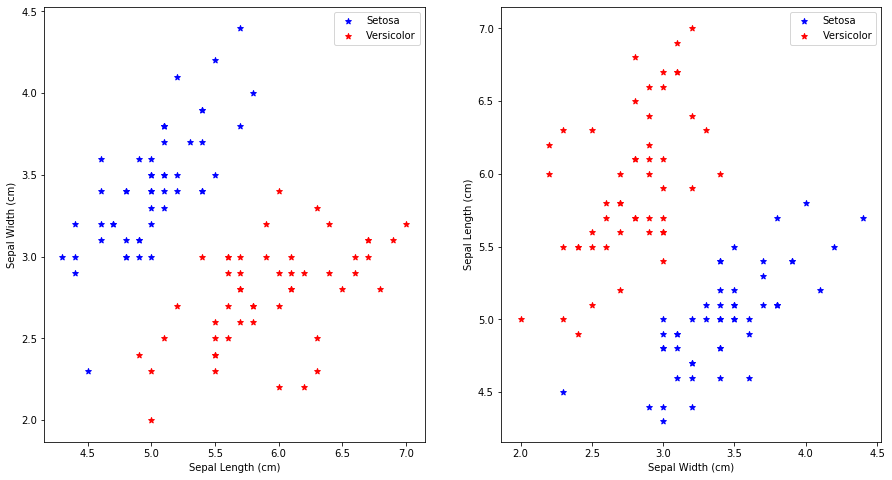

In [24]:
fig = plt.figure(figsize=[15,8])
ax1 = fig.add_subplot(121)
ax1.scatter(setosa[:,0], setosa[:,1], color='b', marker='*', label="Setosa")
ax1.scatter(versicolor[:,0], versicolor[:,1], color='r', marker='*', label="Versicolor")
ax1.set_xlabel("Sepal Length (cm)")
ax1.set_ylabel("Sepal Width (cm)")
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.scatter(setosa[:,1], setosa[:,0], color='b', marker='*', label="Setosa")
ax2.scatter(versicolor[:,1], versicolor[:,0], color='r', marker='*', label="Versicolor")
ax2.set_xlabel("Sepal Width (cm)")
ax2.set_ylabel("Sepal Length (cm)")
ax2.legend()

In [25]:
def step_activation(input):
    return np.where(input >= 0, 1, -1)


def sigmoid_activation(input):
    return 1 / (1 + np.exp(-input))

In [26]:
inputs = np.linspace(-10,10,100)
step_outputs = step_activation(inputs)
sigmoid_outputs = sigmoid_activation(inputs)

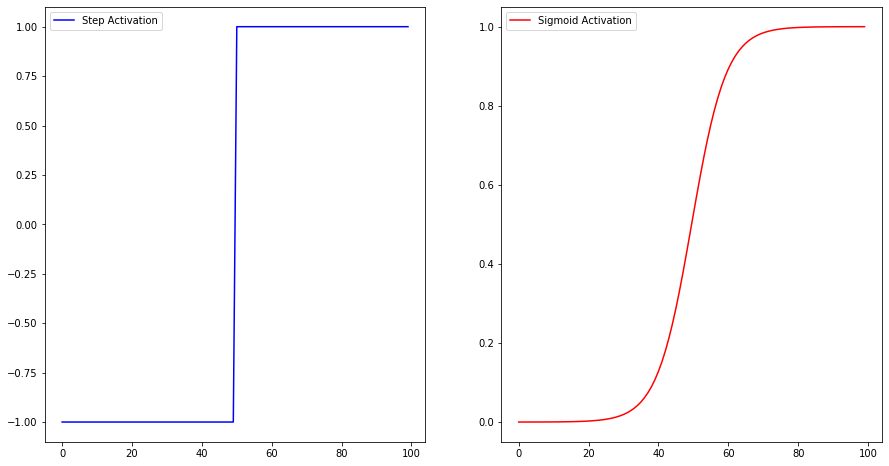

In [27]:
fig = plt.figure(figsize=[15,8])

ax1 = fig.add_subplot(121)
ax1.plot(step_outputs, label="Step Activation", color='b')
ax1.legend()

ax2 = fig.add_subplot(122)
ax2.plot(sigmoid_outputs, label="Sigmoid Activation", color='r')
ax2.legend()

In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, targets, test_size=0.25, random_state=1, stratify=targets)

In [30]:
class Perceptron(object):
    
    def __init__(self, feature_size):
        self.weights = np.zeros(1 + feature_size)
        self.acc = 0.0
        
    def forward(self, input):
        return np.dot(input, self.weights[1:]) + self.weights[0]
    
    def predict(self, input):
        return np.where(self.forward(input) >= 0, 1, -1)
        
    def fit(self, X, y, epochs=10, lr=0.01, verbose=False):
        for e in range(1, epochs+1):
            for features, target in zip(X,y):
                prediction = self.predict(features)
                update = lr * (target - prediction)
                
                self.weights[1:] += update * features
                self.weights[0] += update
                
            self.acc = accuracy_score(y_test, self.predict(X_test))
            if verbose:
                print(f"Epoch: {e}/{epochs}, Accuracry: {self.acc}, Weights: {self.weights}")
                
        return self

In [41]:
un_trained_perceptron = Perceptron(feature_size=2)
trained_perceptron = Perceptron(feature_size=2).fit(X_train, y_train, epochs=200)

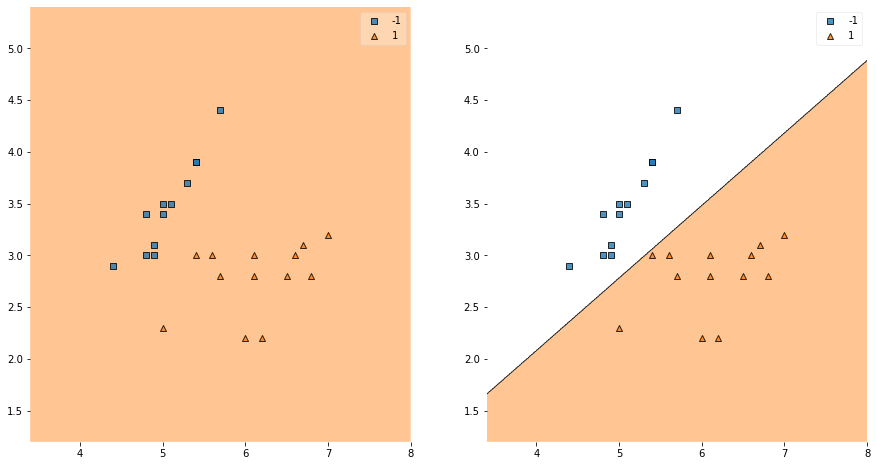

In [42]:
fig = plt.figure(figsize=[15,8])

ax1 = fig.add_subplot(121)
ax1 = plot_decision_regions(X_test, y_test, clf=un_trained_perceptron)


ax2 = fig.add_subplot(122)
ax2 = plot_decision_regions(X_test, y_test, clf=trained_perceptron)